In [1]:
import sys
import os
sys.path.append("..")

import torch
import torchvision.transforms as transforms
from src.datasets.coco import CocoDetection
from src.utils.collate_fn_coco import collate_fn_coco
import clip
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/userhome/37/ywguo/summer-intern/github/BoxCLIP/notebook'

In [3]:
root = '/userhome/37/ywguo/summer-intern/datasets/val2017'
annFile = '/userhome/37/ywguo/summer-intern/datasets/annotations/instances_val2017_new.json'
annFile_cap = '/userhome/37/ywguo/summer-intern/datasets/annotations/captions_val2017.json'

In [4]:
clip_model, clip_preprocess = clip.load("ViT-B/32", device='cpu')

In [5]:
coco = CocoDetection(root=root, annFile=annFile, annFile_cap=annFile_cap, transform=clip_preprocess)

loading annotations into memory...
Done (t=0.80s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


torch.Size([3, 224, 224])
['A woman posing for the camera standing on skis.', 'a woman standing on skiis while posing for the camera', 'A woman in a red jacket skiing down a slope', 'A young woman is skiing down the mountain slope. ', 'a person on skis makes her way through the snow']


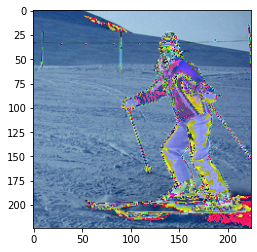

In [6]:
to_pil_image = transforms.ToPILImage()
plt.imshow(to_pil_image(coco[0][0]))
print(coco[0][0].shape)
print(coco[0][2])

torch.Size([2, 3, 224, 224])
torch.Size([2, 3, 224, 224])


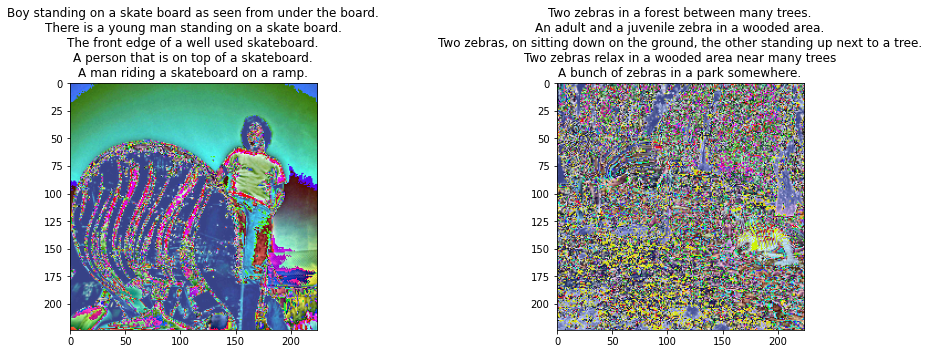

In [8]:
data_loader = torch.utils.data.DataLoader(coco, batch_size=2, shuffle=True, collate_fn=collate_fn_coco)

num_image = 2
plt.figure(figsize=(16,10))
for batch in data_loader:
    for i in range(num_image):
        plt.subplot(2,2,i+1)
        plt.imshow(to_pil_image(batch['clip_images'][i]))
        print(batch['clip_images'].shape)
        plt.title('\n'.join(batch['clip_texts'][i]))
    break

In [ ]:
# from pycocotools.coco import COCO
# coco = COCO(annFile)

# img_id = list(coco.imgs.keys())[0]
# anns = coco.loadAnns(coco.getAnnIds(img_id))

In [22]:
texts = clip.tokenize(batch['clip_texts'][0])
d_feature = clip_model.encode_text(texts)
d_feature.mean(dim=0, keepdim=True).shape
# d_feature.shape
# batch['clip_texts']

torch.Size([1, 512])